# Felipe Castillo
# Mile Stone 1
# Data Mining
# 04/20/2022

  In this project, we will work with the database Bank Turnover Dataset. This data set can be found and downloaded here: https://www.kaggle.com/datasets/barelydedicated/bank-customer-churn-modeling. Banks rely on the consumer to keep the money in the bank. With higher turnovers, the bank’s loaning power decreases. Coming to our hypothesis, is it possible to get a good idea of potential churns, and with that minimal information, could we reduce churns? In all reality, the money the consumer puts in the bank isn’t always there. For example, if you have a million dollars in the bank and ask to withdraw that amount in cash in one day, the bank will most likely not be able to give you that sum of money. Why is that? It is because the banks loan the money and charge interest on that money. 

The problem with churn is that it can limit the bank’s overall lending power. The money must come from somewhere. For the bank to be able to make money, it needs money. This is a problem because the bank could lose money in the long run. Depending on the level of churn there are ramifications when there is less money in the bank. This will likely cause higher interest rates on loans. Even the smallest levels of churn could pose a problem. For example, if Elon Musk took his money out of the bank, it would have a larger impact than if a lot of people who had money in the bank took out their money. With that same logic, a small group of people could potentially make most of the money in the bank. With that said, it is imperative to understand churn to either stop it or be able to prepare for it. 

The first step in this graphical analysis is to figure out the percentage of churn in the bank. From that base, we need to know who those people are. For this purpose, we need to identify everyone by nationality, gender, age, and score. All this information will help answer one question: who are these people? Secondly, we need a correlation matrix to identify if there is a relation between values. For example, do gender differences matter when it comes to people leaving the bank? Is there a correlation between bank churns and the values that need to be investigated? The values that are in the data set will need to be investigated further.

There are a few predictive models that come to mind. First, we have a logistic regression model due to the binary option of 0 or 1. This will also help us test our hypothesis on if we could help prevent churn. The other model is survival analysis which also has that binary aspect. By binary I mean 1 they did leave or 0 they didn’t leave. Overall, the main objective is to predict bank churn.





In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge , LogisticRegression
from sklearn.metrics import r2_score ,accuracy_score,mean_squared_error,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,confusion_matrix,roc_curve,roc_auc_score
from sklearn.decomposition import PCA
import random
from sklearn.metrics import r2_score
from math import sqrt

from sklearn.metrics import mean_squared_error
#Change path to week one folder for DSC-550
#Current directory in documents
os.chdir('C:\DataScience_DSC_550\Week6')


In [3]:
bank_turn_overDF = pd.read_csv("data_turn.csv")

In [4]:
bank_turn_overDF.head()

,Row,Id,Surname,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
bank_turn_overDF.shape

(10000, 14)

In [6]:
bank_turn_overDF.columns.values

array(['Row', 'Id', 'Surname', 'Score', 'Nationality', 'Gender', 'Age',
       'Tenure', 'Balance', 'Products', 'Card', 'Active', 'Salary',
       'Exited'], dtype=object)

In [7]:
#VGS_df.groupby('Genre')['Name'].count()
# exited 1 == churn
bank_turn_overDF.groupby('Exited')['Exited'].count()

Exited
0    7963
1    2037
Name: Exited, dtype: int64

# Pie Chart

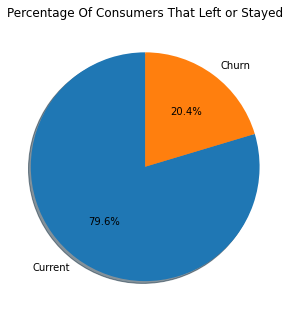

In [8]:
# 0 == current has not left the bank
# 1 == left the bank
labels = ['Current','Churn']


#setting plot figure size
fig = plt.figure(figsize=(7,4))
#setting ax to figure shape 
ax = fig.add_axes((0,0,.5,1))
#setting tiltle name
plt.title("Percentage Of Consumers That Left or Stayed")
#unpacking values in pie
#getting the exact values for exits
ax.pie( bank_turn_overDF.groupby('Exited')['Exited'].count(),labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  
plt.show()

This graph indicates that 20.4% of the people ended up leaving the bank. There was 79.6 percent of the people that have continued to stay with the bank. Overall, the attrition rate doesn’t seem to be too extreme. Essentially, we must look to see why 20% of those people are quitting. 

# Bar Graph

Each person must be classified by their individual traits. This will help us limit the scope of those people that are leaving the bank.

In [9]:
#young adults(ages 18-35 years; n = 97), 
#middle-aged adults (ages 36-55 years, n = 197), 
#and older adults (aged older than 55 years, n = 49).
#https://pubmed.ncbi.nlm.nih.gov/11815703/   

#Taking the Age value and returning the group it stands in
# the age group is taken from the government article, to define age groups

def age_classification(age):
    #initializing value to none 
    age_value = None
    #taking age and returning value 
    #using artilce to base classification age
    if(age >= 18 and age <=35):
        age_value = 'young_adults'
    elif(age>=36 and age<=55):
        age_value = 'middle_aged_adults'
    elif(age> 55):
        age_value = 'older_adult'
    else:
        age_value = None
    return age_value
    
        
        

In [10]:
#https://www.experian.com/blogs/ask-experian/credit-education/score-basics/what-is-a-good-credit-score/

#scores resembles our credit structure
#assumption is that these score are similar to our scores
def score_classificaiton(score):
    score_value = None
    #taking score and returning value 
    #using article to base classification score on us experian score
    if(score <= 579):
        score_value = 'Poor'
    elif(score>= 580 and score <=669):
        score_value = 'Fair'
    elif(score>=670 and score <= 739):
        score_value = 'Good'
    elif(score>=740 and score <=799):
        score_value = 'Very_Good'
    elif(score > 800):
        score_value = 'Exceptional'
    else:
        score_value = None
    return score_value

In [11]:
#this score is well within our fico score
#My assumption is this score is similar to credit score
#To prove this assumption, I am taking the min , median, and max

min_score = bank_turn_overDF['Score'].min()
mid_score = bank_turn_overDF['Score'].median()
max_score = bank_turn_overDF['Score'].max()

print("Lowest Score {}\nMiddle Score {}\nHighest score {} ".format(min_score,mid_score, max_score))


Lowest Score 350
Middle Score 652.0
Highest score 850 


In [12]:
#copying original data frame
bank_GeneralCustomerInfo_df = bank_turn_overDF.copy()

#Getting age group , applying age_classification function
#New column Age_Group
bank_GeneralCustomerInfo_df['Age_Group'] = bank_GeneralCustomerInfo_df['Age'].apply(age_classification)

#Getting score group , applying score_classification function
#New column Score_Group
bank_GeneralCustomerInfo_df['Score_Group'] = bank_GeneralCustomerInfo_df['Score'].apply(score_classificaiton)

In [13]:
bank_GeneralCustomerInfo_df.head(3)

,Row,Id,Surname,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited,Age_Group,Score_Group
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,middle_aged_adults,Fair
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,middle_aged_adults,Fair
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,middle_aged_adults,Poor


In [14]:
#Removing  mutiple columns, these columns dont provide useful information and have to be removed.
#only personal individual information will be displayed.
bank_GeneralCustomerInfo_df = bank_GeneralCustomerInfo_df.drop(['Row', 'Id', 'Surname',  
       'Tenure', 'Balance', 'Products', 'Card', 'Salary',
       'Exited','Age','Score','Active'], axis=1).copy()

In [15]:
bank_GeneralCustomerInfo_df.head(3)

,Nationality,Gender,Age_Group,Score_Group
0,France,Female,middle_aged_adults,Fair
1,Spain,Female,middle_aged_adults,Fair
2,France,Female,middle_aged_adults,Poor


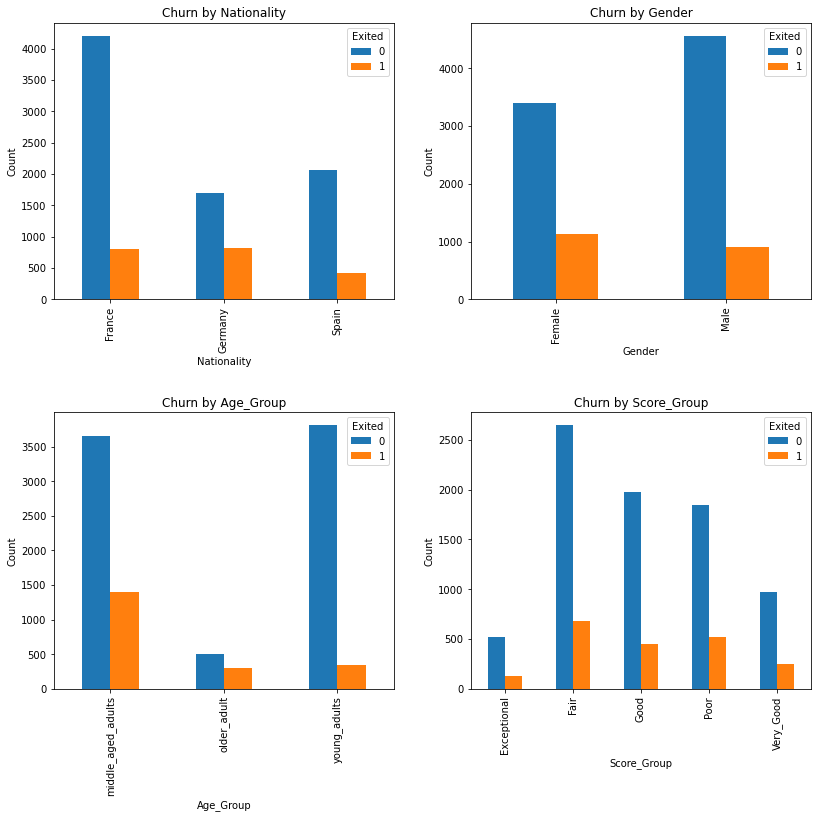

In [16]:
#Setting figure size
fig = plt.figure(figsize=(12,12))
#initializing count to 1
count = 1
#taking each column in bank_GeneralCustomerInfo_df
#Should consist of 4 
for i in bank_GeneralCustomerInfo_df.columns.values:
    #4 plots will show the subplot will be set to 2 and 2
    ax = plt.subplot(2,2,count)
    #Setting value by comparision of bank turn over('Exited')
    pd.crosstab(bank_GeneralCustomerInfo_df[i],bank_turn_overDF['Exited']).plot(kind='bar',ax=ax)
    plt.tight_layout(pad=3.0)
    
    #Setting title to instance of first columns
    plt.title("Churn by "+ i)
    plt.xlabel(i)
    plt.ylabel("Count")
    
    #counter increment for new plot
    count = count + 1

The graph could be thought of as one big graph. There does seem to be more women leaving the bank than men. It also looks like they are more men that are staying at the bank than women. As a base of nationality, Germany and France have similar exit rates versus Spain which has a lower rate. It also seems like middle-aged adults between 36 and 55 are disproportionately leaving the bank versus young adults and older adults. Fair and poor credit scores have the highest exit rates from the bank.

In [17]:
#Seeing the difference size in gender
#There are more males then females, this can explain the previous graph on why there are more men that stay in the bank.
bank_GeneralCustomerInfo_df.groupby('Gender')['Gender'].count()

Gender
Female    4543
Male      5457
Name: Gender, dtype: int64

# Correlation Coefficient Matrix

In [18]:
#Setting a martix to original values
#Removeing Row number and Id , would provided information for correlation graph
bank_t_over = bank_turn_overDF.drop(['Row', 'Id'], axis=1).copy()

corrMatrix = bank_t_over.corr()

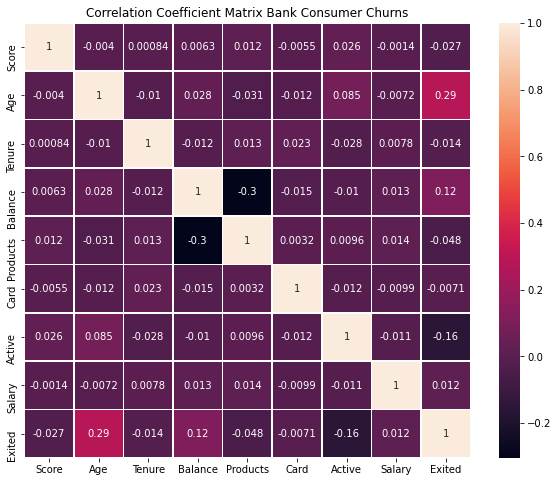

In [19]:
#All values of corrMatrix will be passed in matrix graph
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(corrMatrix, annot= True,  linewidths=.5, ax=ax)
plt.title("Correlation Coefficient Matrix Bank Consumer Churns")
plt.show()

There are three values that have a positive correlation to people that have exited. The first is age with a 29 percent positive correlation. Balance and salary both have the same correlation at 12 percent. This shows that the age and the amount of money factor into whether the person will leave or not.

# Histogram

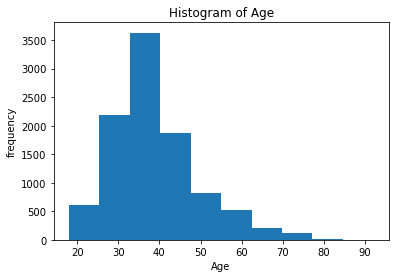

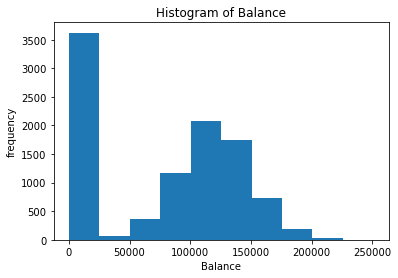

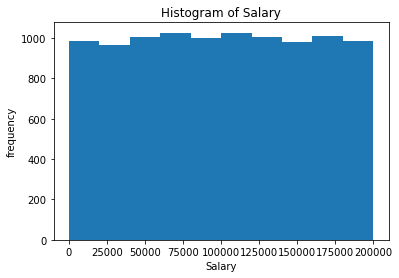

In [20]:
#heat map had values that had some correlation with exited
#this means the values should be looked into more
#Plot the graphs that have correlation with exits
#only values with any correlation will be graphed, there should be 3
for i in enumerate(bank_t_over):
    if(i[1] == 'Age' or i[1] == 'Salary' or i[1] == 'Balance'):
        plt.title("Histogram of " +i[1])
        plt.hist(bank_t_over[i[1]])
        plt.xlabel(i[1])
        plt.ylabel("frequency")
   
        plt.show()

The greatest number of people leaving are between the ages of 30 and 40 years. With most of the balances being between 0 and 50,000 dollars. It levels off around 150,000 and 200,000 dollars. Overall, these traits are the ones with a positive correlation. The salary that people make is all over the board meaning they are not normal distributions.


# Conclusion

The overall bank churn is around 20.4%. This means that 79.6% of the consumers stay with the bank. Also, there are more men at the bank than women. However, there are more women leaving the bank than men. In other words, there are fewer women at the bank, and a large number leaving the bank. Perhaps there are some gender factors that should be investigated. On an age factor, more middle-aged people are leaving the bank than other age groups. The score values indicate that those people with a fair credit score are more likely to churn. Exceptional credit scores have very few people that end up exiting. A data entry that would make this picture complete would be interest rates. Perhaps the score gives them perks. There are 3 values that have a correlation with bank churn which are age, balance, and salary. Age has the highest factor. The average age to churn is between the ages of 30 and 40. The overall average balance is between 0 and 23/30 thousand. The salaries for churn are all over the board. Overall, this begins to cover some answers to the first few questions. With that said, it arises more questions.

# Felipe Castillo
# Mile Stone 2
# Data Mining
# 05/04/2022

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge , LogisticRegression
from sklearn.metrics import r2_score ,accuracy_score,mean_squared_error,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,confusion_matrix,roc_curve,roc_auc_score
from sklearn.decomposition import PCA
import random
from sklearn.metrics import r2_score
from math import sqrt

from sklearn.metrics import mean_squared_error
#Change path to week one folder for DSC-550
#Current directory in documents
os.chdir('C:\DataScience_DSC_550\Week6')

The graphical analysis gave me some insight in the values we need to increase the accuracy of our model. With that said, there might be an error with milestone 1 assumption that the surname held no significance. However, now I am realizing the surname could be useful in order to get a better understanding of bank churn. What gave me this idea was the other day when I had my sister deposit money in my  bank. It hit me, what if churn can also be related to family dynamics? For example, my whole family has banked with Banc First for over 10 years, my wife took my last name although its not her surname, how would the bank be able to tell the difference? Because the name is Castillo, it should be counted as surname.  The assumption is that if there are more then one name with the same surname, they might be related. Therefore, we need to justify surname before we drop this column.However, we can’t concluded that they are indeed related. There might be people with the same surname that are not related. But if there are doubles in the data set, its worth keep.


In [2]:
bank_turn_overDF = pd.read_csv("data_turn.csv")

In [3]:
bank_turn_overDF.head(2)

,Row,Id,Surname,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


According to our graphical analysis. There were a few features like products that had a negative correlation with exits. With that said, its not enough to convince that the negative features should be removed. The individual feature could be useless on its own, but the overall pictures might tell something different. For example, do people age matter when getting products? The assumption is probably so, I know at age 30 I was able to have way more then I did at age 23. In this case age does have a correlation with bank churn. 



In [4]:
#Setting a martix to original values
#Removeing Row number and Id , would provided information for correlation graph
bank_t_over = bank_turn_overDF.drop(['Row', 'Id'], axis=1).copy()


Dropping Id and Row because it holds no value for our model. Row indicates the number of records we have which doesn’t give any meaning to our overall hypothesis. The order of the bank row doesn’t matter in the case.  The Id also needs to be dropped. It doesn’t hold any useful information that could help our model. It doesn’t matter what the person ID is because it doesn’t hold any meaning to who the person is. For example, salary explains the level of money he brings in. It can also be true that the person can be classified as low earner or a higher earner. The id has no numerical or categorical usefulness.

In [5]:
bank_t_over.head(3)

,Surname,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [6]:
#Checking for duplicates,
#The truth is that there seems to be some significance, in the name,
#How ever there are duplicates, now i need to see if the number is significant

bank_t_over_dups = bank_t_over[bank_t_over['Surname'].duplicated()].copy()
print("Duplicate Rows except first occurrence based on all columns are :")
print(bank_t_over_dups.head(5).Surname)

Duplicate Rows except first occurrence based on all columns are :
89     Osborne
94       Capon
102       Hung
114    Fanucci
122    Cameron
Name: Surname, dtype: object


In [7]:
# find words with their count
unique = []
#looking at all surname name
for i in bank_t_over['Surname']:
    #if the name is not in the array then it will be placed
    if i not in unique:
        unique.append(i)
print(unique)

['Hargrave', 'Hill', 'Onio', 'Boni', 'Mitchell', 'Chu', 'Bartlett', 'Obinna', 'He', 'H?', 'Bearce', 'Andrews', 'Kay', 'Chin', 'Scott', 'Goforth', 'Romeo', 'Henderson', 'Muldrow', 'Hao', 'McDonald', 'Dellucci', 'Gerasimov', 'Mosman', 'Yen', 'Maclean', 'Young', 'Nebechi', 'McWilliams', 'Lucciano', 'Azikiwe', 'Odinakachukwu', 'Sanderson', 'Maggard', 'Clements', 'Lombardo', 'Watson', 'Lorenzo', 'Armstrong', 'Cameron', 'Hsiao', 'Clarke', 'Osborne', 'Lavine', 'Bianchi', 'Tyler', 'Martin', 'Okagbue', 'Yin', 'Buccho', 'Chidiebele', 'Trevisani', "O'Brien", 'Parkhill', 'Yoo', 'Phillipps', 'Tsao', 'Endrizzi', "T'ien", 'Velazquez', 'Hunter', 'Clark', 'Jeffrey', 'Pirozzi', 'Jackson', 'Hammond', 'Brownless', 'Chibugo', 'Glauert', 'Pisano', 'Konovalova', 'McKee', 'Palermo', 'Ballard', 'Wallace', 'Cavenagh', 'Hu', 'Read', 'Bushell', 'Postle', 'Buley', 'Leonard', 'Mills', 'Onyeorulu', 'Beit', 'Ndukaku', 'Gant', 'Rowley', 'Sharpe', 'Heap', 'Ritchie', 'Cole', 'Capon', 'Fiorentini', 'Graham', 'Yuille', 'A

In [8]:
#creating an array of surname and the count of occurances
surname_array = []

#checking the number size of the unique array
for names in range(len(unique)):
    #setting current words to each instance of name
    current_word = unique[names]
    count = 0
    
    #looping through  data frame, and counting the times int comes up
    for all_names in bank_t_over['Surname']:
        if(current_word ==  all_names and current_word != ''):
            #count if name found
            count = count + 1
    #before the second loop i have surname account and count
    if(current_word != '' and count > 2):
        surname_array.append([current_word,count])
        print(current_word,count)

  

Hill 17
Onio 8
Boni 14
Mitchell 20
Chu 22
Bartlett 4
He 18
H? 19
Andrews 6
Kay 5
Chin 16
Scott 29
Henderson 16
Hao 12
McDonald 19
Dellucci 13
Yen 14
Maclean 24
Young 20
Nebechi 6
Lucciano 11
Azikiwe 5
Odinakachukwu 4
Sanderson 4
Clements 9
Lombardo 15
Watson 20
Lorenzo 12
Cameron 19
Hsiao 8
Clarke 4
Osborne 6
Bianchi 10
Tyler 4
Martin 29
Okagbue 3
Yin 11
Buccho 14
Chidiebele 3
Trevisani 20
O'Brien 4
Parkhill 4
Tsao 17
Endrizzi 17
T'ien 18
Hunter 13
Clark 16
Pirozzi 14
Jackson 9
Hammond 3
Chibugo 5
Pisano 16
Konovalova 4
Palermo 12
Ballard 3
Wallace 19
Hu 12
Read 3
Leonard 5
Mills 7
Onyeorulu 5
Ndukaku 3
Rowley 7
Sharpe 3
Ritchie 11
Cole 4
Capon 14
Fiorentini 14
Graham 20
Fanucci 23
Fu 16
Hung 15
Bradley 8
Parsons 6
T'ang 13
Thorpe 6
Chiemela 5
Ko 19
Welch 5
Duncan 19
Chidozie 5
Wu 16
Kennedy 20
Calabresi 16
Zetticci 11
Fuller 7
MacDonald 13
Piccio 13
Kaodilinakachukwu 4
Cocci 17
Alekseeva 4
Chinweike 3
Li 12
Ma 23
Chia 14
Tien 18
Taylor 15
Madukwe 6
Olisanugo 6
Chukwufumnanya 5
Harris 

Surname does have some significance. It could be family names and have some relationship with churn. With that said, there needs to be caution with assuming that there is a family dynamic. It could be that a lot of people have the same name in the area or its just common. However, there are surname with up to 20 occurrences. The level of occurrences can’t be ignored. We will keep surname as one of our features.

According to our graphical analysis. There were a few features like products that had a negative correlation with exits. With that said, its not enough to convince me that the negative features should be removed. The individual feature could be useless on its own, but the overall pictures might tell something different. For example, do people age matter when getting products? The assumption is probably so, I know at age 30 I was able to have way more then I did at age 23. In this case age does have a correlation with bank churn. 



In [9]:
bank_t_over.isnull().sum()

Surname        0
Score          0
Nationality    0
Gender         0
Age            0
Tenure         0
Balance        0
Products       0
Card           0
Active         0
Salary         0
Exited         0
dtype: int64

In [10]:
#young adults(ages 18-35 years; n = 97), 
#middle-aged adults (ages 36-55 years, n = 197), 
#older adults (aged older than 55 years, n = 49).
#https://pubmed.ncbi.nlm.nih.gov/11815703/   

#Taking the Age value and returning the group it stands in
# the age group is taken from the government article, to define age groups

def age_classification(age):
    #initializing value to none 
    age_value = None
    #taking age and returning value 
    #using artilce to base classification age
    if(age >= 18 and age <=35):
        age_value = 'young_adults'
    elif(age>=36 and age<=55):
        age_value = 'middle_aged_adults'
    elif(age> 55):
        age_value = 'older_adult'
    else:
        age_value = None
    return age_value
    
        

In [11]:
#https://www.experian.com/blogs/ask-experian/credit-education/score-basics/what-is-a-good-credit-score/

#scores resembles our credit structure
#assumption is that these score are similar to our scores
def score_classificaiton(score):
    score_value = None
    #taking score and returning value 
    #using article to base classification score on us experian score
    if(score <= 579):
        score_value = 'Poor'
    elif(score>= 580 and score <=669):
        score_value = 'Fair'
    elif(score>=670 and score <= 739):
        score_value = 'Good'
    elif(score>=740 and score <=799):
        score_value = 'Very_Good'
    elif(score > 800):
        score_value = 'Exceptional'
    else:
        score_value = None
    return score_value

In [12]:
#Using the histogram to set a bases for balance
#Values could be recalibrated to different amounts.
#Amounts set to thirds

def balance_classification(amount):
    balance_value = None
    
    if( amount <=75000):
        balance_value = 'low_amount'
    elif(amount>=75000 and amount <=150000):
        balance_value = 'middle_amount'
    elif(amount> 150000):
        age_value = 'high_amount'
    else:
         balance_value= None
    return  balance_value

In [13]:
#https://www.investopedia.com/financial-edge/0912/which-income-class-are-you.aspx
#$25,471.00	$84,372.00	$187,094.00 example for maryland

#seems like salary average are close to the united states
#assumption is that salaries are similar, using a base line from investopedia
def salary_classification(salary):
    #initializing value to none 
    salary_value = None
    #taking salary and returning value 
    #using artilce to base classification salary
    if( salary <=25000):
        salary_value = 'low_income'
    elif(salary >25000 and salary<=84000):
        salary_value = 'middle_income'
    elif(salary > 84000):
        salary_value= 'high_income'
    else:
        salary_value = None
    return salary_value

In [14]:

#Getting age group , applying age_classification function
#New column Age_Group
bank_t_over['Age_Group'] = bank_t_over['Age'].apply(age_classification)

#Getting score group , applying score_classification function
#New column Score_Group
bank_t_over['Score_Group'] = bank_t_over['Score'].apply(score_classificaiton)

#coorelation factors
#These features had a coorelation with exits
#Getting balance group , applying balance_classification function
#Getting salary group , applying salary_classification function
bank_t_over['Balance_Group'] = bank_t_over['Balance'].apply(balance_classification)
bank_t_over['Salary_Group'] = bank_t_over['Salary'].apply(salary_classification)




In [15]:
bank_t_over.shape

(10000, 16)

At the moment the computer only knows that there is a difference between numerical values. For example, it knows that having 100 thousand in the bank is more then 0 in the bank. However the computer doesn’t know whether the salary is low, middle, or high. Therefore, we need to tell the model that there is a difference between these classified values. Originally, I did this for age and credit score. Now I am doing it with account balance and salary, which have correlated values. 

In [16]:
#Using pd get dummy to convert to dummy values
#Now that I have the values reclassified, I am going to encode it. This will allow our model to work effectively. 

bank_t_over = pd.get_dummies(bank_t_over)

In [17]:
bank_t_over.head(4)

,Score,Age,Tenure,Balance,Products,Card,Active,Salary,Exited,Surname_Abazu,...,Score_Group_Exceptional,Score_Group_Fair,Score_Group_Good,Score_Group_Poor,Score_Group_Very_Good,Balance_Group_low_amount,Balance_Group_middle_amount,Salary_Group_high_income,Salary_Group_low_income,Salary_Group_middle_income
0,619,42,2,0.00,1,1,1,101348.88,1,0,...,0,1,0,0,0,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,...,0,1,0,0,0,0,1,1,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,...,0,0,0,1,0,0,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,0,0,1,0,0,1,0,1,0,0


In [18]:
bank_t_over.shape

(10000, 2959)

When the classification of the new features is complete, we are left with 16 columns. After we encode our classified features, we have 2959 columns. A lot of those columns come from the surname column that are repurposed to fit our hypothesis. However, all the 2000 plus columns might not be needed. Its hard to justify all the columns will have a direct impact to our model. With that said we need to perform reduction to see if our model still yields a good accuracy score. If it does, we can officially reduce our feature. Why is this important? It difficult to deal with that many columns. Think about this would it be easier to work with 50 or 2959.

# Scaling 

In [19]:
#splitting exited as main target, this shows if person has left the bank
#splitting all other columns to features 
target = bank_t_over[['Exited']]
features = bank_t_over.drop(["Exited"], axis=1)


In [20]:
#standarizing data
scaler = StandardScaler()

#scaling features
features_scaled = scaler.fit_transform(features)

# PCA Logistic Regression

In [21]:
#instantiating PCA
pca = PCA(n_components= 50)

#Setting to a lower amount of components
#Original scaled 2959
features_pca = pca.fit_transform(features_scaled)
features_pca.shape

(10000, 50)

In [22]:
#instantiating logistic regression class, raising iter value to 1000
logReg = LogisticRegression(solver='lbfgs', max_iter=1000)

In [23]:
features_train, features_test, target_train,target_test = train_test_split(features_pca ,target, test_size=.20)

In [24]:
logReg.fit(features_train, np.ravel(target_train))

LogisticRegression(max_iter=1000)

In [25]:
predicted = logReg.predict(features_test)

In [26]:
accuracy_score(target_test,predicted)

0.803

The accuracy is sufficient enough to be to use as our main logistic regression model. The model needs to be investigated more, but the reduction was successful.

I took a few steps to get the data ready for modeling. First, I droped the Id and Row columns. Both features did not have any value towards our model. Both of those features were dropped. There was a complication with justifying that we should drop surname. If you would have asked me last week, I would have undoubtfully dropped it. This week the data was investigated, and it can give insight to family ties, therefore I kept surname. I could not justify dropping other values and decided to keep them. I think these extra features could add to our model. I added 4 extra features based off already existing features. These classifications should improve our model by including a bases for those features.





# Felipe Castillo
# Mile Stone 3
# Data Mining
# 05/18/2022

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge , LogisticRegression
from sklearn.metrics import r2_score ,accuracy_score,mean_squared_error,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix,roc_curve,roc_auc_score
from sklearn.decomposition import PCA
import random
from sklearn.metrics import r2_score
from math import sqrt

from sklearn.metrics import mean_squared_error
#Change path to week one folder for DSC-550
#Current directory in documents
os.chdir('C:\DataScience_DSC_550\Week6')



In [2]:
bank_turn_overDF = pd.read_csv("data_turn.csv")

In [3]:
#Setting a martix to original values
#Removeing Row number and Id , would provided information for correlation graph
bank_t_over = bank_turn_overDF.drop(['Row', 'Id'], axis=1).copy()

In [4]:
bank_t_over.head(1)

,Surname,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
0,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [5]:
bank_t_over.shape

(10000, 12)

In milestone 2 we came up with a format to classify some of our features. This should help the overall performance of our model.

In [6]:
#young adults(ages 18-35 years; n = 97), 
#middle-aged adults (ages 36-55 years, n = 197), 
#older adults (aged older than 55 years, n = 49).
#https://pubmed.ncbi.nlm.nih.gov/11815703/   

#Taking the Age value and returning the group it stands in
# the age group is taken from the government article, to define age groups

def age_classification(age):
    #initializing value to none 
    age_value = None
    #taking age and returning value 
    #using artilce to base classification age
    if(age >= 18 and age <=35):
        age_value = 'young_adults'
    elif(age>=36 and age<=55):
        age_value = 'middle_aged_adults'
    elif(age> 55):
        age_value = 'older_adult'
    else:
        age_value = None
    return age_value
    

In [7]:
#https://www.experian.com/blogs/ask-experian/credit-education/score-basics/what-is-a-good-credit-score/

#scores resembles our credit structure
#assumption is that these score are similar to our scores
def score_classificaiton(score):
    score_value = None
    #taking score and returning value 
    #using article to base classification score on us experian score
    if(score <= 579):
        score_value = 'Poor'
    elif(score>= 580 and score <=669):
        score_value = 'Fair'
    elif(score>=670 and score <= 739):
        score_value = 'Good'
    elif(score>=740 and score <=799):
        score_value = 'Very_Good'
    elif(score > 800):
        score_value = 'Exceptional'
    else:
        score_value = None
    return score_value

In [8]:
#Using the histogram to set a bases for balance
#Values could be recalibrated to different amounts.
#Amounts set to thirds

def balance_classification(amount):
    balance_value = None
    
    if( amount <=75000):
        balance_value = 'low_amount'
    elif(amount>=75000 and amount <=150000):
        balance_value = 'middle_amount'
    elif(amount> 150000):
        age_value = 'high_amount'
    else:
         balance_value= None
    return  balance_value

In [9]:
#https://www.investopedia.com/financial-edge/0912/which-income-class-are-you.aspx
#$25,471.00	$84,372.00	$187,094.00 example for maryland

#seems like salary average are close to the united states
#assumption is that salaries are similar, using a base line from investopedia
def salary_classification(salary):
    #initializing value to none 
    salary_value = None
    #taking salary and returning value 
    #using artilce to base classification salary
    if( salary <=25000):
        salary_value = 'low_income'
    elif(salary >25000 and salary<=84000):
        salary_value = 'middle_income'
    elif(salary > 84000):
        salary_value= 'high_income'
    else:
        salary_value = None
    return salary_value

In [10]:

#Getting age group , applying age_classification function
#New column Age_Group
bank_t_over['Age_Group'] = bank_t_over['Age'].apply(age_classification)

#Getting score group , applying score_classification function
#New column Score_Group
bank_t_over['Score_Group'] = bank_t_over['Score'].apply(score_classificaiton)

#coorelation factors
#These features had a coorelation with exits
#Getting balance group , applying balance_classification function
#Getting salary group , applying salary_classification function
bank_t_over['Balance_Group'] = bank_t_over['Balance'].apply(balance_classification)
bank_t_over['Salary_Group'] = bank_t_over['Salary'].apply(salary_classification)




In [11]:
#Encoding Our Data Set
bank_t_over = pd.get_dummies(bank_t_over)

In [12]:
bank_t_over.head(3)

,Score,Age,Tenure,Balance,Products,Card,Active,Salary,Exited,Surname_Abazu,...,Score_Group_Exceptional,Score_Group_Fair,Score_Group_Good,Score_Group_Poor,Score_Group_Very_Good,Balance_Group_low_amount,Balance_Group_middle_amount,Salary_Group_high_income,Salary_Group_low_income,Salary_Group_middle_income
0,619,42,2,0.00,1,1,1,101348.88,1,0,...,0,1,0,0,0,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,...,0,1,0,0,0,0,1,1,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,...,0,0,0,1,0,0,0,1,0,0


In [13]:
#splitting exited as main target, this shows if person has left the bank
#splitting all other columns to features 
target = bank_t_over[['Exited']]
features = bank_t_over.drop(["Exited"], axis=1)



The reason for choosing logistic regression is due to the classification issue that we are investigating. Our data has binary-based outcomes. For example, we are looking to see if we can predict whether someone will leave the bank. The outcome is either a yes or no, which can be interrupted as a 0 or 1. In other words we need to see the direct relationship between the dependent variable and our independent variable. We want to see if those relationship will cause churn. So, we need a model to determine the probability of a yes or no answer. That being did the person leave the bank.

# Logistic Regression

In [18]:
#We need to make sure that all our data points are comparable. If there are to many differences with overwhelming ranges this will affect our model. Therefore, if we standardized, it should give use a base line.

In [14]:
#standarizing data
scaler = StandardScaler()

In [15]:
#scaling features
features_scaled = scaler.fit_transform(features)

In [17]:
#During our devolvement in milestone 2. I used PCA on the data to see if it was possible to reduce without effecting our overall accuracy. We concluded that our model will yield a solid accuracy score even if reduce to 50 components.  

In [16]:
#instantiating PCA
pca = PCA(n_components= 50)

#Setting to a lower amount of components
#Original scaled 2959
features_pca = pca.fit_transform(features)

In [17]:
sfeatures_train, sfeatures_test, starget_train,starget_test = train_test_split(features_pca ,target, test_size=.20)

In [18]:
#instantiating logistic regression class, raising iter value to 1000
logReg_Scaled = LogisticRegression(solver='lbfgs', max_iter=1000)

In [19]:
#Fitting values
logReg_Scaled.fit(sfeatures_train, np.ravel(starget_train))

LogisticRegression(max_iter=1000)

In [20]:
spredicted = logReg_Scaled.predict(sfeatures_test)

In [21]:
accuracy_score(starget_test,spredicted)

0.656

In [22]:
#Get recall_score
scaled_recall =recall_score(starget_test,spredicted)
scaled_recall

0.7263427109974424

In [23]:
#Get precision_score
scaled_precision = precision_score(starget_test,spredicted)
scaled_precision

0.3283236994219653

In [24]:
#Get f1_score
scaled_f1 = f1_score(starget_test,spredicted)
scaled_f1

0.45222929936305734

# RandomForestClassifier

In [25]:
#Comparing the performance of our model to another model. Random forest is also a classification model. We will see how our logistic model compares to random forest model.
RandFor =  RandomForestClassifier(n_estimators=100)

In [26]:
#-----Takes around 10 mintues to run without pca 
RandFor.fit(sfeatures_train, np.ravel(starget_train))

RandomForestClassifier()

In [29]:
#Running PCA for this model helped reduce our process time by 9 minutes. So far the model still yeilds a good accuaracy score.

In [27]:
rpredicted = RandFor.predict(sfeatures_test)

In [28]:
accuracy_score(starget_test,rpredicted)

0.855

In [29]:
r_recall =recall_score(starget_test,rpredicted)
r_recall

0.38107416879795397

In [38]:
#Get precision_score
r_precision = precision_score(starget_test,spredicted)
r_precision

0.3283236994219653

In [31]:
#Get f1_score
r_f1 = f1_score(starget_test,rpredicted)
r_f1

0.5068027210884354

# Cross Validation

In [35]:
#Comparing confusion matrix to compare the true values with the predicted values for each model.  

In [32]:
#logestic Confusion Matrix
results = confusion_matrix(starget_test,spredicted)
print(results)

[[1028  581]
 [ 107  284]]


In [33]:
#Random Forest Confusion Matrix
results = confusion_matrix(starget_test,rpredicted)
print(results)

[[1561   48]
 [ 242  149]]


The confusion matrix shows that most values are close. 

# ROC Curve

In [34]:
#Setting a random line for our graph prediction
#Setting as a base line to for other model comparison 
r_probs = [0 for i in range(len(starget_test))]

#Setting logestic regression by predicting probabilty that the target will be 0 or 1
rl_probs_scaled = logReg_Scaled.predict_proba(sfeatures_test)

##Setting random forest by predicting probabilty that the target will be 0 or 1
rf_probs = RandFor.predict_proba(sfeatures_test)

In [35]:
# Getting Postive
rf_probs = rf_probs[:,1]

#Getting Postive
rl_probs_scaled = rl_probs_scaled[:,1]

In [36]:
#Getting the FPR,TPR and threshold values for each model

#Random prediction line will yeild a straight line.
r_fpr , r_tpr , _ = roc_curve(starget_test,r_probs)

#Random forest FRP , TRP
rf_fpr , rf_tpr , _ = roc_curve(starget_test,rf_probs)

#Logestic Regression FRP , TRP
srl_fpr , srl_tpr , _ = roc_curve(starget_test,rl_probs_scaled)


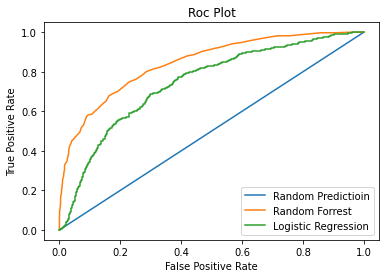

In [37]:
#plotting roc curve
plt.plot(r_fpr,r_tpr, label= "Random Predictioin")
plt.plot(rf_fpr , rf_tpr, label="Random Forrest")
plt.plot(srl_fpr , srl_tpr, label="Logistic Regression")


plt.title("Roc Plot")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Conclusion

The  logistic regression model accuracy were 77% with a recall score of .085, a precision score of .40, and a f1 score of .14. The random forest classifier had an accuracy score of 85%. It has a recall score of .37, a precision score .40, and a f1 score of .51. On average the random forest had a higher accuracy score than the logistic regression. What’s interesting is the recall, precision, and f1 score. Recall, F1, and precision measures a model’s accuracy when making predictions. Precision measures how precise and accurate we predicted positive and how many of them are actually positive. While recall calculates how man actual positive our model captures as True positive. F1 takes both precision and recall and a balance of both. Random forest has better f1 then logistic regression. The logistic regression has a low score and brings suspect to the model accuracy.  The Roc plot shows that the random forest classifier is the better model. The way it works is it takes the true positive compared to the false positive. If you follow the line, where it intersects it should give you an idea of true positive to false positive rate. An example is if you follow the 60 percent line, this means that it predicted correct 60 percent of the time, and 20 percent of the time it will get it incorrect. The curve is closer to one for random forest classifier. 

After re-running the code a few times. I was looking for consistency in the performance. However logistic regression was not consistent and would be all over the place in accuracy. Random Forrest was consistent holding around 80% accuracy.




Overall, random forest is the better model.